# **Import Libraries**

In [1]:
!pip install streamlit pandas scikit-learn wordcloud matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.6 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import streamlit as st

# **Load the Dataset**

In [3]:
# Load the dataset
df = pd.read_csv('/content/emails.csv')

# Display the first few rows
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# **Data Size and Shape**

In [5]:
# Check the number of rows (emails) and columns in the dataset
dataset_shape = df.shape
num_emails = dataset_shape[0]  # Number of emails (rows)
num_columns = dataset_shape[1]  # Number of columns

# Display the size of the dataset
print(f"Number of emails: {num_emails}")
print(f"Number of columns: {num_columns}")

Number of emails: 5728
Number of columns: 2


# **Number of Spam and Ham Emails**

In [6]:
# Count the number of spam (1) and ham (0) emails
spam_count = df['spam'].value_counts()

# Check the labels and ensure spam is represented as 1, ham as 0
if 1 in spam_count.index and 0 in spam_count.index:
    num_spam = spam_count[1]
    num_ham = spam_count[0]
elif True in spam_count.index and False in spam_count.index:  # If the labels are True/False
    num_spam = spam_count[True]
    num_ham = spam_count[False]
else:
    print("The dataset may have different spam labels. Check the 'spam' column values.")

# Display the counts
print(f"Number of spam emails: {num_spam}")
print(f"Number of ham (not spam) emails: {num_ham}")

Number of spam emails: 1368
Number of ham (not spam) emails: 4360


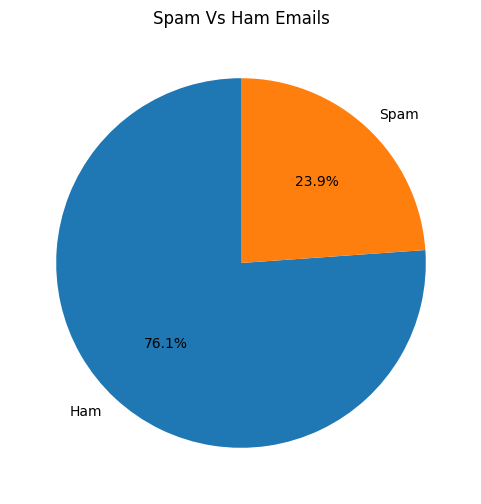

In [7]:
# @title Distribution of Spam and Ham Emails

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

spam_counts = df['spam'].value_counts()

labels = ['Ham', 'Spam']
sizes = spam_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
_ = plt.title('Spam Vs Ham Emails')

# **Data Preprocessing**

In [8]:
# Function to clean email text
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()               # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

# Apply the cleaning function to the text column
df['text'] = df['text'].apply(clean_text)

In [10]:
# Check for missing values in the dataset
missing_values_count = df.isnull().sum()
print(missing_values_count)

text    0
spam    0
dtype: int64


#  **Exploratory Data Analysis (EDA)**

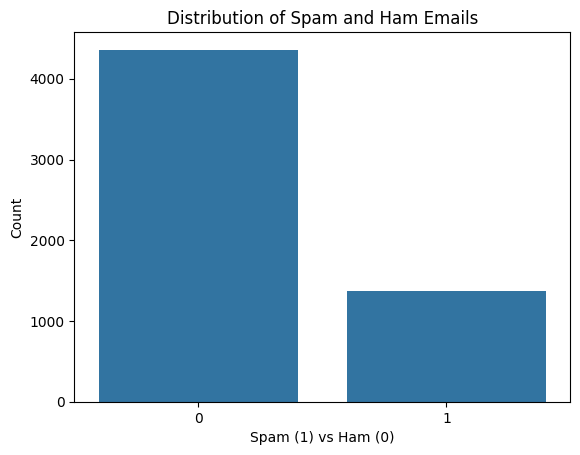

In [15]:
# Visualize the distribution of spam and ham emails
sns.countplot(x='spam', data=df)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Spam (1) vs Ham (0)')
plt.ylabel('Count')
plt.show()

# **Split the Dataset in to Training and Testing Sets**

In [ ]:
# Split the dataset into features and target variable
X = df['text']
y = df['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Feature Extraction**

In [ ]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

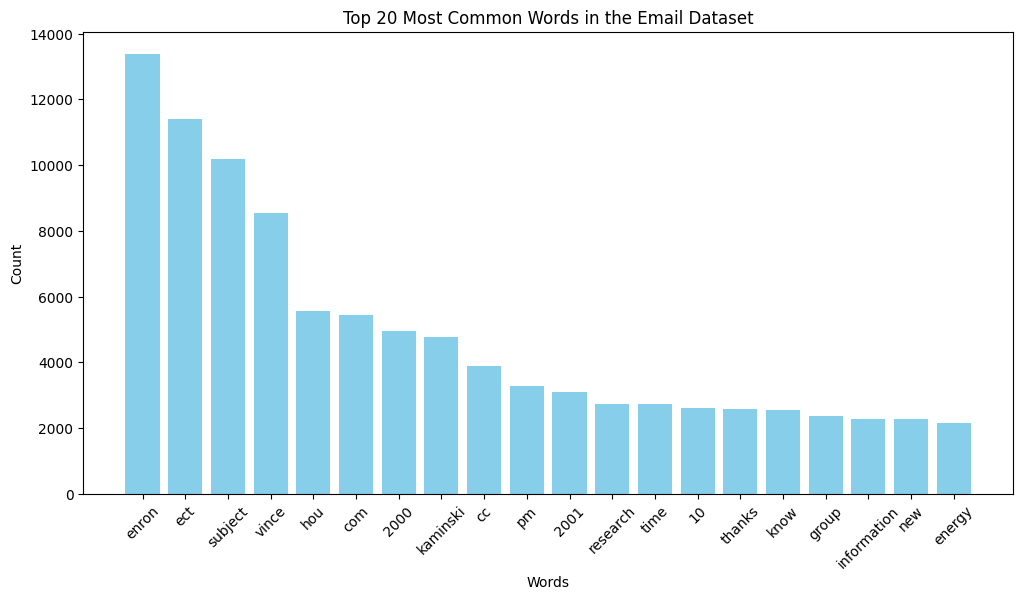

In [ ]:
# Load your dataset (replace 'emails.csv' with your dataset file)
data = pd.read_csv('emails.csv')

# Combine all email text into one single string
all_text = " ".join(data['text'])

# Use CountVectorizer to count word frequencies
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform([all_text])

# Create a DataFrame for word frequencies
word_count_array = word_counts.toarray().flatten()
word_freq_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': word_count_array})

# Sort by count and get the top 20 words
top_20_words = word_freq_df.sort_values(by='count', ascending=False).head(20)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_20_words['word'], top_20_words['count'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 20 Most Common Words in the Email Dataset')
plt.xticks(rotation=45)
plt.show()

# **Train the Model**

In [ ]:
# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Fit the model on the training data
model.fit(X_train_vectorized, y_train)

MultinomialNB()

# **Model Evaluation**

Accuracy: 98.78%


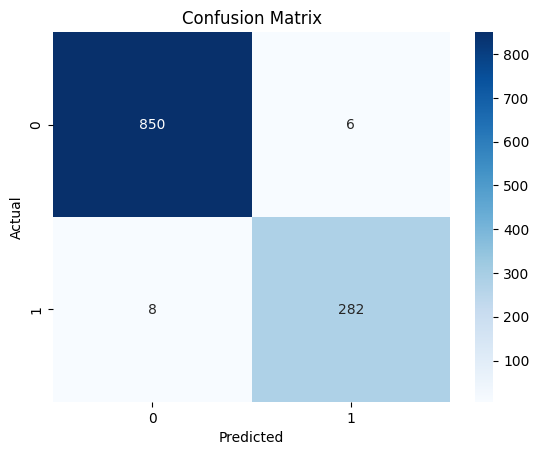

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.97      0.98       290

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

## **Word Cloud**

In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('emails.csv')

# Check if the data is loaded correctly
print(data.head())  # To verify that the dataset is loaded


                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


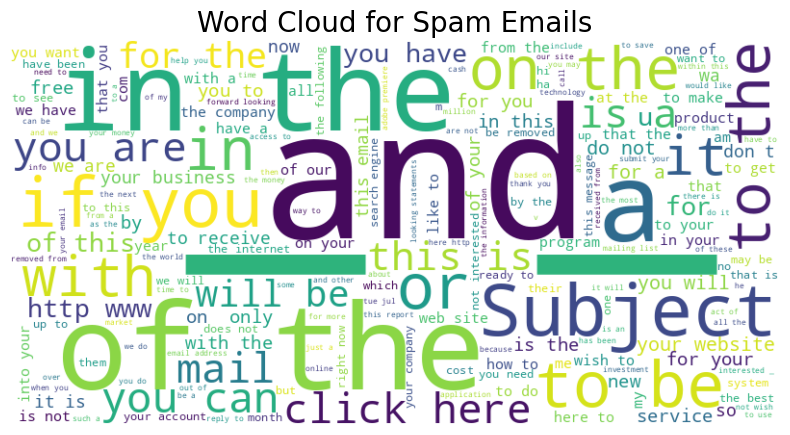

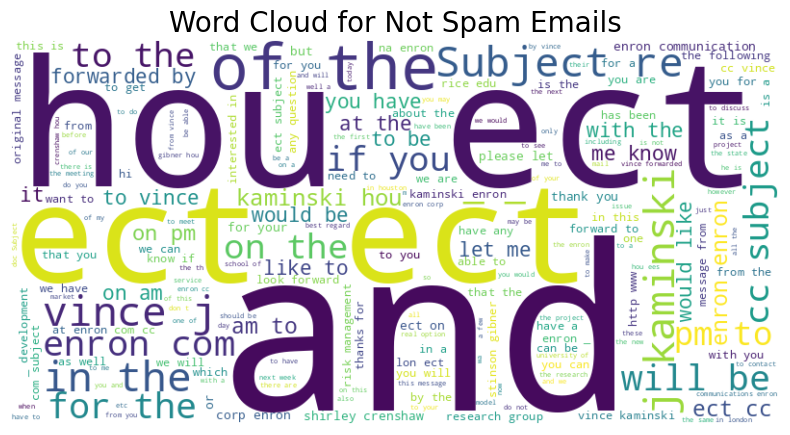

In [ ]:
spam_emails = data[data['spam'] == 1]['text']
not_spam_emails = data[data['spam'] == 0]['text']

# Combine all spam and not spam emails into single strings
spam_text = " ".join(spam_emails)
not_spam_text = " ".join(not_spam_emails)

# Function to generate and display word clouds
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, stopwords='english').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Generate and display word clouds
plot_wordcloud(spam_text, "Word Cloud for Spam Emails")
plot_wordcloud(not_spam_text, "Word Cloud for Not Spam Emails")

# **Deployment with Streamlit**

In [ ]:
# Save the trained model and vectorizer
import joblib

joblib.dump(model, 'spam_detector_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

# Streamlit app

['vectorizer.pkl']

In [ ]:
import streamlit as st
import joblib
import pandas as pd

# Load the model and vectorizer
model = joblib.load('spam_detector_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Streamlit app title
st.title("Spam Email Detection System")

# User input for email text
input_text = st.text_area("Enter your email text:")

# Predict button
if st.button("Predict"):
    # Preprocess and vectorize the input
    cleaned_input = clean_text(input_text)
    input_vectorized = vectorizer.transform([cleaned_input])

    # Make prediction
    prediction = model.predict(input_vectorized)

    # Display the result
    if prediction[0] == 1:
        st.write("This email is Spam.")
    else:
        st.write("This email is Not Spam.")

2024-11-02 05:49:46.372 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 05:49:46.585 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-02 05:49:46.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 05:49:46.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 05:49:46.594 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 05:49:46.596 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 05:49:46.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 05:49:46.600 Session state does not 